In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('/content/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32920,2013,2013,WA,Washington,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,NaN,Value,...,"(47.52227862900048, -120.47001078999972)",FV,FV1,Q019,VALUE,53.0,Income,"$35,000 - $49,999",INC,INC3550
32921,2013,2013,WA,Washington,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,NaN,Value,...,"(47.52227862900048, -120.47001078999972)",FV,FV1,Q019,VALUE,53.0,Age (years),55 - 64,AGEYR,AGEYR5564
32922,2013,2013,WA,Washington,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,NaN,Value,...,"(47.52227862900048, -120.47001078999972)",FV,FV1,Q019,VALUE,53.0,Education,Some college or technical school,EDU,EDUCOTEC
32923,2012,2012,WY,Wyoming,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,VALUE,56.0,Age (years),45 - 54,AGEYR,AGEYR4554


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32925 entries, 0 to 32924
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   32925 non-null  int64  
 1   YearEnd                     32925 non-null  int64  
 2   LocationAbbr                32924 non-null  object 
 3   LocationDesc                32924 non-null  object 
 4   Datasource                  32924 non-null  object 
 5   Class                       32924 non-null  object 
 6   Topic                       32924 non-null  object 
 7   Question                    32924 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             32924 non-null  object 
 10  Data_Value                  29979 non-null  float64
 11  Data_Value_Alt              29979 non-null  float64
 12  Data_Value_Footnote_Symbol  2945 non-null   object 
 13  Data_Value_Footnote         294

In [4]:
df = df.drop(['Low_Confidence_Limit','High_Confidence_Limit ', 'Total', 'Data_Value_Alt', 'YearEnd','Topic','Class','Datasource','Data_Value_Unit','QuestionID','ClassID','TopicID','DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','StratificationCategoryId1','StratificationID1'],1);
df = df.drop(['GeoLocation', 'Question', 'StratificationCategory1', 'Stratification1', 'Gender'],1)

<ipython-input-4-af4968d13d2a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Low_Confidence_Limit','High_Confidence_Limit ', 'Total', 'Data_Value_Alt', 'YearEnd','Topic','Class','Datasource','Data_Value_Unit','QuestionID','ClassID','TopicID','DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','StratificationCategoryId1','StratificationID1'],1);
<ipython-input-4-af4968d13d2a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['GeoLocation', 'Question', 'StratificationCategory1', 'Stratification1', 'Gender'],1)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32925 entries, 0 to 32924
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YearStart       32925 non-null  int64  
 1   LocationAbbr    32924 non-null  object 
 2   LocationDesc    32924 non-null  object 
 3   Data_Value      29979 non-null  float64
 4   Sample_Size     29979 non-null  float64
 5   Age(years)      7055 non-null   object 
 6   Education       4701 non-null   object 
 7   Income          8229 non-null   object 
 8   Race/Ethnicity  9406 non-null   object 
 9   LocationID      32924 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 2.5+ MB


In [6]:
df=df.dropna(subset=['Education'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4701 entries, 3 to 32922
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YearStart       4701 non-null   int64  
 1   LocationAbbr    4701 non-null   object 
 2   LocationDesc    4701 non-null   object 
 3   Data_Value      4701 non-null   float64
 4   Sample_Size     4701 non-null   float64
 5   Age(years)      0 non-null      object 
 6   Education       4701 non-null   object 
 7   Income          0 non-null      object 
 8   Race/Ethnicity  0 non-null      object 
 9   LocationID      4701 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 404.0+ KB


In [7]:
def lower_case_column_names(df):
    df.columns=[i.lower() for i in df.columns]
    return df


In [8]:
df=lower_case_column_names(df)
df

,yearstart,locationabbr,locationdesc,data_value,sample_size,age(years),education,income,race/ethnicity,locationid
3,2011,AL,Alabama,33.6,1153.0,NaN,Less than high school,NaN,NaN,1.0
4,2011,AL,Alabama,32.8,2402.0,NaN,High school graduate,NaN,NaN,1.0
5,2011,AL,Alabama,33.8,1925.0,NaN,Some college or technical school,NaN,NaN,1.0
6,2011,AL,Alabama,26.4,1812.0,NaN,College graduate,NaN,NaN,1.0
31,2011,AL,Alabama,33.2,1153.0,NaN,Less than high school,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...
32880,2013,WA,Washington,47.6,528.0,NaN,Less than high school,NaN,NaN,53.0
32881,2013,WA,Washington,40.9,2395.0,NaN,High school graduate,NaN,NaN,53.0
32882,2013,WA,Washington,36.2,3256.0,NaN,Some college or technical school,NaN,NaN,53.0
32883,2013,WA,Washington,29.3,4391.0,NaN,College graduate,NaN,NaN,53.0


In [9]:
df.dtypes

yearstart           int64
locationabbr       object
locationdesc       object
data_value        float64
sample_size       float64
age(years)         object
education          object
income             object
race/ethnicity     object
locationid        float64
dtype: object

In [10]:
print(df.duplicated().sum())

4


In [11]:
df = df.drop_duplicates()

In [12]:
df.isna()


,yearstart,locationabbr,locationdesc,data_value,sample_size,age(years),education,income,race/ethnicity,locationid
3,False,False,False,False,False,True,False,True,True,False
4,False,False,False,False,False,True,False,True,True,False
5,False,False,False,False,False,True,False,True,True,False
6,False,False,False,False,False,True,False,True,True,False
31,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
32880,False,False,False,False,False,True,False,True,True,False
32881,False,False,False,False,False,True,False,True,True,False
32882,False,False,False,False,False,True,False,True,True,False
32883,False,False,False,False,False,True,False,True,True,False


In [13]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

yearstart           0.0
locationabbr        0.0
locationdesc        0.0
data_value          0.0
sample_size         0.0
age(years)        100.0
education           0.0
income            100.0
race/ethnicity    100.0
locationid          0.0
dtype: float64

In [14]:
df = df.drop(['age(years)'],1)

<ipython-input-14-91dcf96e044d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['age(years)'],1)


In [15]:
def remove_outliers(df):
    for col in df.select_dtypes(include=np.number).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df.drop(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index, inplace=True)

In [16]:
remove_outliers(df)
df

,yearstart,locationabbr,locationdesc,data_value,sample_size,education,income,race/ethnicity,locationid
3,2011,AL,Alabama,33.6,1153.0,Less than high school,NaN,NaN,1.0
4,2011,AL,Alabama,32.8,2402.0,High school graduate,NaN,NaN,1.0
5,2011,AL,Alabama,33.8,1925.0,Some college or technical school,NaN,NaN,1.0
6,2011,AL,Alabama,26.4,1812.0,College graduate,NaN,NaN,1.0
31,2011,AL,Alabama,33.2,1153.0,Less than high school,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...
32880,2013,WA,Washington,47.6,528.0,Less than high school,NaN,NaN,53.0
32881,2013,WA,Washington,40.9,2395.0,High school graduate,NaN,NaN,53.0
32882,2013,WA,Washington,36.2,3256.0,Some college or technical school,NaN,NaN,53.0
32883,2013,WA,Washington,29.3,4391.0,College graduate,NaN,NaN,53.0


In [17]:
def standardize_text(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.lower()

In [18]:
standardize_text(df)
df

,yearstart,locationabbr,locationdesc,data_value,sample_size,education,income,race/ethnicity,locationid
3,2011,al,alabama,33.6,1153.0,less than high school,NaN,NaN,1.0
4,2011,al,alabama,32.8,2402.0,high school graduate,NaN,NaN,1.0
5,2011,al,alabama,33.8,1925.0,some college or technical school,NaN,NaN,1.0
6,2011,al,alabama,26.4,1812.0,college graduate,NaN,NaN,1.0
31,2011,al,alabama,33.2,1153.0,less than high school,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...
32880,2013,wa,washington,47.6,528.0,less than high school,NaN,NaN,53.0
32881,2013,wa,washington,40.9,2395.0,high school graduate,NaN,NaN,53.0
32882,2013,wa,washington,36.2,3256.0,some college or technical school,NaN,NaN,53.0
32883,2013,wa,washington,29.3,4391.0,college graduate,NaN,NaN,53.0


In [19]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical = df[numerical_columns]
numerical

,yearstart,data_value,sample_size,locationid
3,2011,33.6,1153.0,1.0
4,2011,32.8,2402.0,1.0
5,2011,33.8,1925.0,1.0
6,2011,26.4,1812.0,1.0
31,2011,33.2,1153.0,1.0
...,...,...,...,...
32880,2013,47.6,528.0,53.0
32881,2013,40.9,2395.0,53.0
32882,2013,36.2,3256.0,53.0
32883,2013,29.3,4391.0,53.0


In [20]:
numerical = numerical.fillna(numerical.mean())
numerical

,yearstart,data_value,sample_size,locationid
3,2011,33.6,1153.0,1.0
4,2011,32.8,2402.0,1.0
5,2011,33.8,1925.0,1.0
6,2011,26.4,1812.0,1.0
31,2011,33.2,1153.0,1.0
...,...,...,...,...
32880,2013,47.6,528.0,53.0
32881,2013,40.9,2395.0,53.0
32882,2013,36.2,3256.0,53.0
32883,2013,29.3,4391.0,53.0


In [21]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical = df[categorical_columns]
categorical

,locationabbr,locationdesc,education,income,race/ethnicity
3,al,alabama,less than high school,NaN,NaN
4,al,alabama,high school graduate,NaN,NaN
5,al,alabama,some college or technical school,NaN,NaN
6,al,alabama,college graduate,NaN,NaN
31,al,alabama,less than high school,NaN,NaN
...,...,...,...,...,...
32880,wa,washington,less than high school,NaN,NaN
32881,wa,washington,high school graduate,NaN,NaN
32882,wa,washington,some college or technical school,NaN,NaN
32883,wa,washington,college graduate,NaN,NaN


In [22]:
categorical


,locationabbr,locationdesc,education,income,race/ethnicity
3,al,alabama,less than high school,NaN,NaN
4,al,alabama,high school graduate,NaN,NaN
5,al,alabama,some college or technical school,NaN,NaN
6,al,alabama,college graduate,NaN,NaN
31,al,alabama,less than high school,NaN,NaN
...,...,...,...,...,...
32880,wa,washington,less than high school,NaN,NaN
32881,wa,washington,high school graduate,NaN,NaN
32882,wa,washington,some college or technical school,NaN,NaN
32883,wa,washington,college graduate,NaN,NaN


In [23]:
categorical.columns

Index(['locationabbr', 'locationdesc', 'education', 'income',
       'race/ethnicity'],
      dtype='object')

In [24]:
in_map = {'less than $15,000':0, '15000-24,999':1, '25000-34,999':2,
          '35000-49,999':3, '50000-74,999':4,
          '$75,000 or greater':5, 'data not reported':6}
in_map
df['income'] = df['income'].map(in_map)

In [25]:
ed_map = {'less than high school': 0, 'high school graduate':1, 'some college or technical school':2,'college graduate':3}
ed_map
df['education'] = df['education'].map(ed_map)

In [27]:
rc_map = {'non-hispanic white': 0, 'non-hispanic black':1, 'hispanic':2,'asian':3, 'hawaiian/pacific islander':4,
       'american indian/alaska native':5, '2 or more races':6, 'other':7}
rc_map
df['race/ethnicity'] = df['race/ethnicity'].map(rc_map)

In [26]:
df

,yearstart,locationabbr,locationdesc,data_value,sample_size,education,income,race/ethnicity,locationid
3,2011,al,alabama,33.6,1153.0,0,NaN,NaN,1.0
4,2011,al,alabama,32.8,2402.0,1,NaN,NaN,1.0
5,2011,al,alabama,33.8,1925.0,2,NaN,NaN,1.0
6,2011,al,alabama,26.4,1812.0,3,NaN,NaN,1.0
31,2011,al,alabama,33.2,1153.0,0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...
32880,2013,wa,washington,47.6,528.0,0,NaN,NaN,53.0
32881,2013,wa,washington,40.9,2395.0,1,NaN,NaN,53.0
32882,2013,wa,washington,36.2,3256.0,2,NaN,NaN,53.0
32883,2013,wa,washington,29.3,4391.0,3,NaN,NaN,53.0


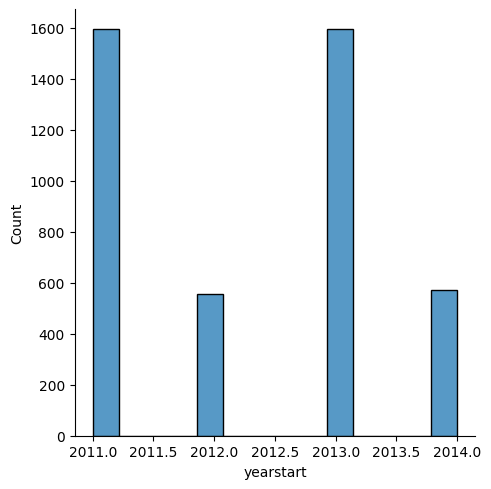

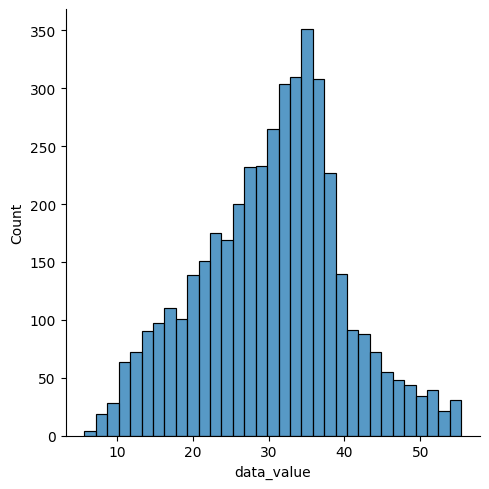

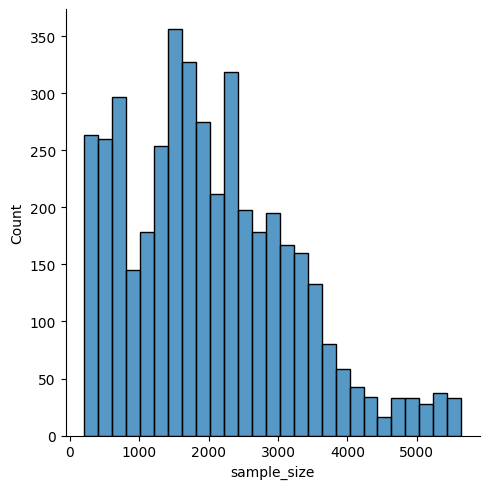

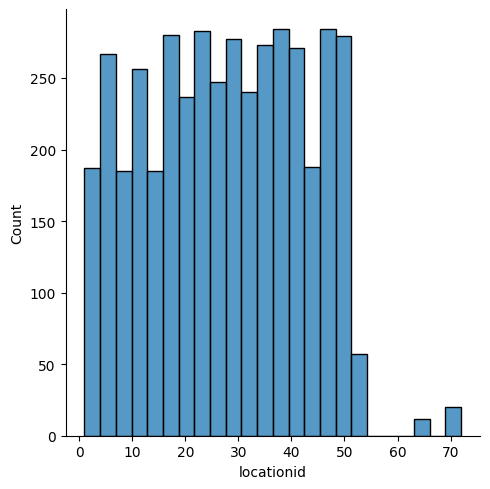

In [28]:
for col in numerical.columns:
    sns.displot(numerical[col])
    plt.show()

In [29]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4312 entries, 3 to 32922
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yearstart    4312 non-null   int64  
 1   data_value   4312 non-null   float64
 2   sample_size  4312 non-null   float64
 3   locationid   4312 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 168.4 KB


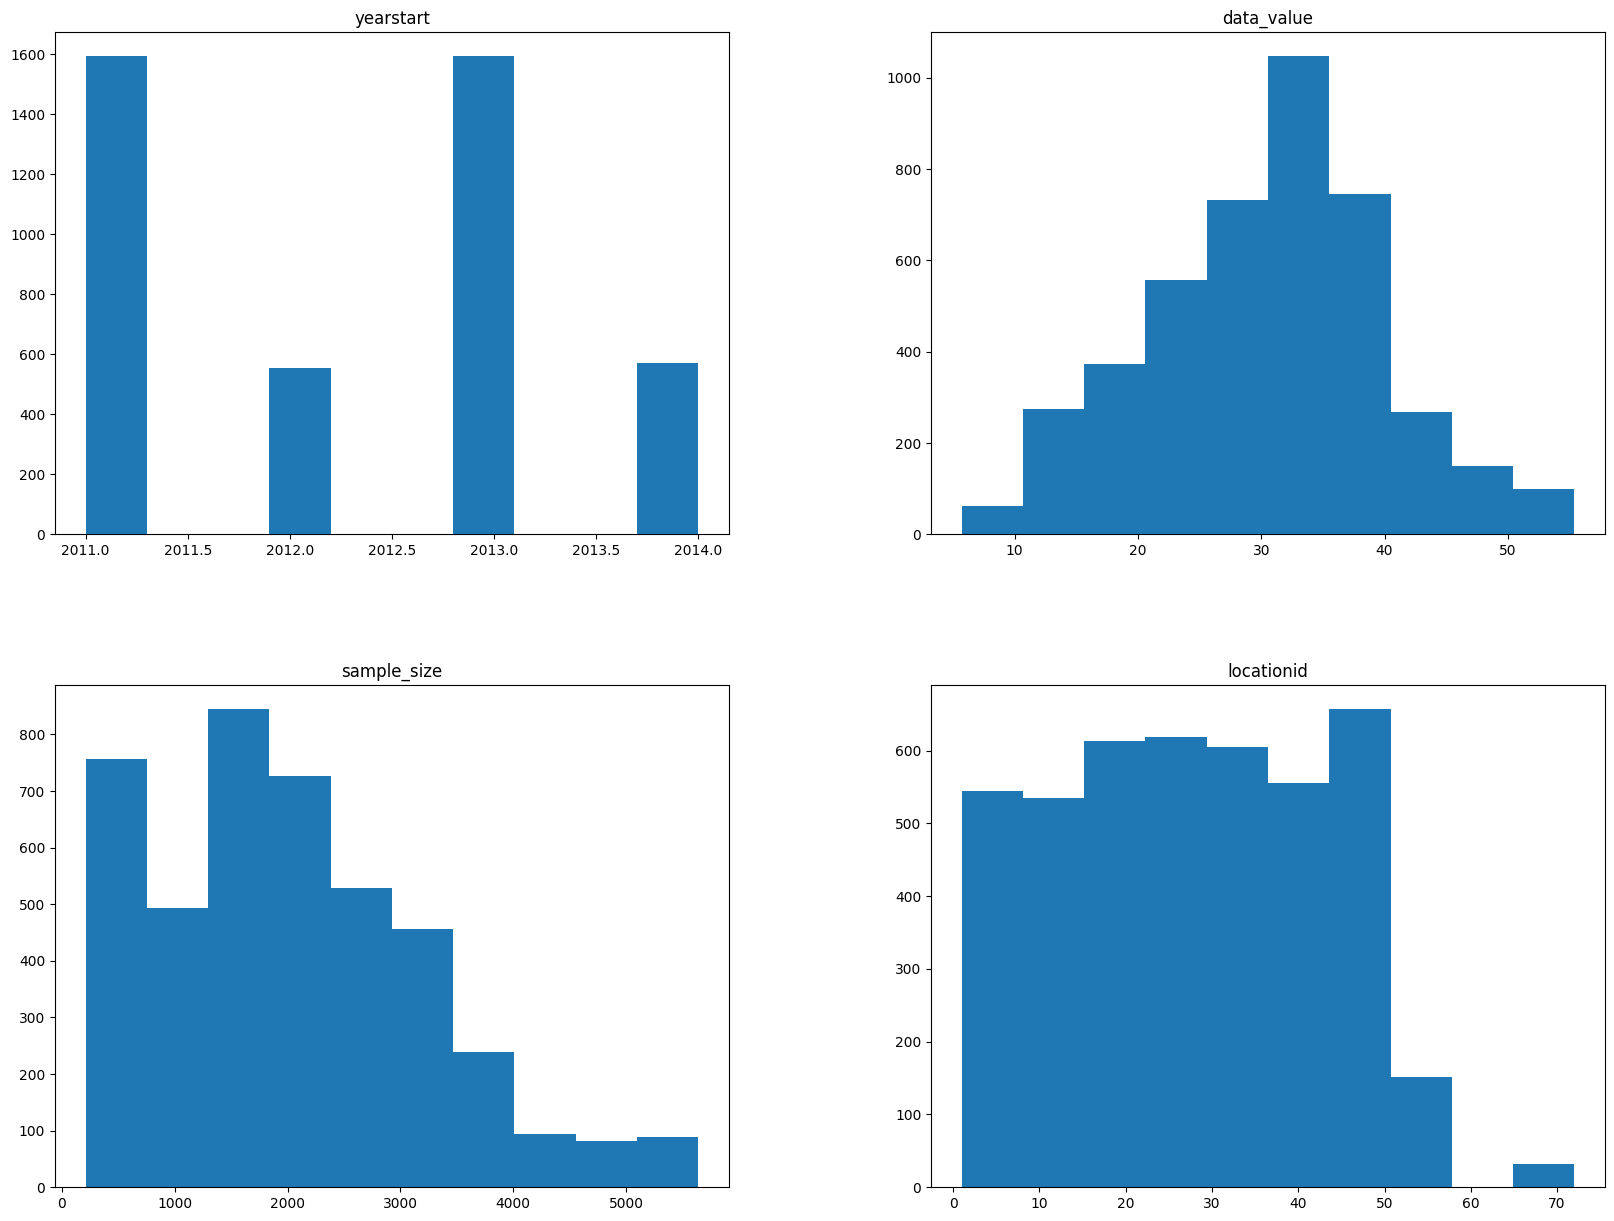

In [30]:
numerical.hist(figsize=(20,15), grid=False)
plt.show()

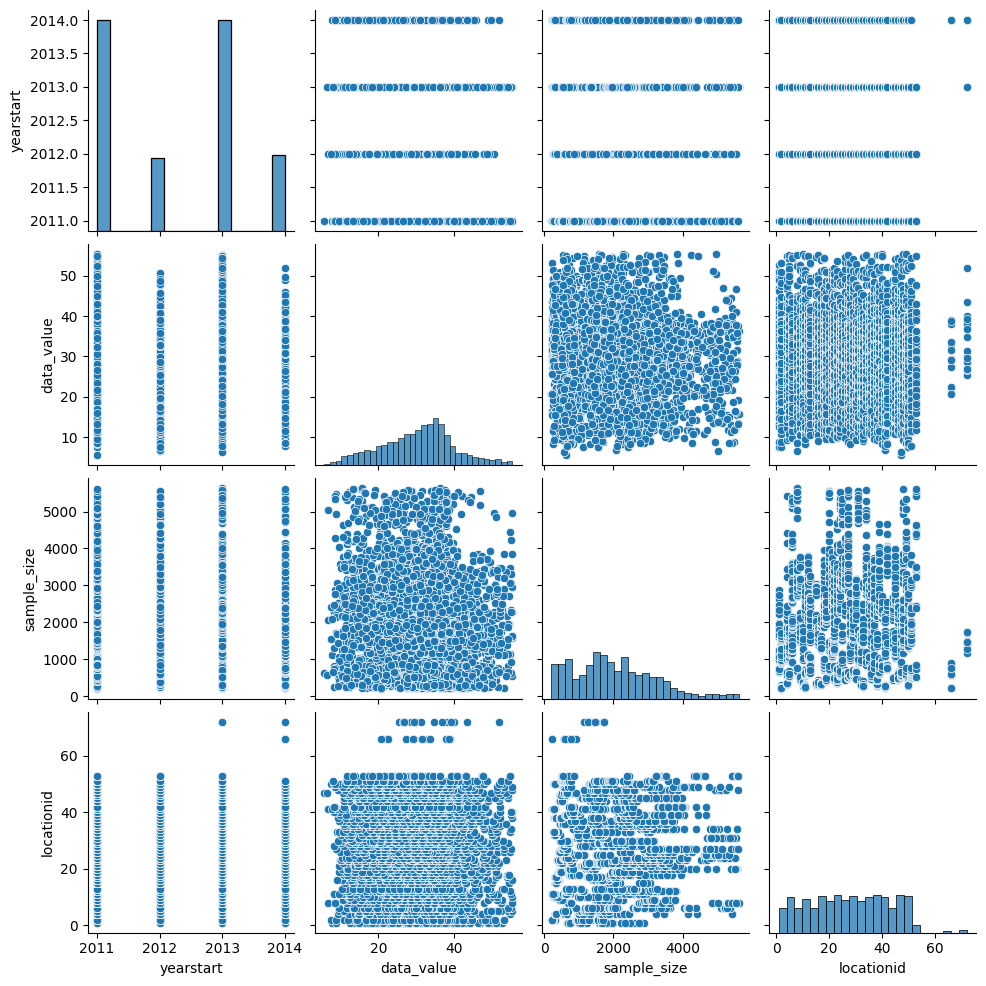

In [31]:
sns.pairplot(numerical)


In [32]:

numerical.corr()

,yearstart,data_value,sample_size,locationid
yearstart,1.000000,0.001740,-0.043079,0.017782
data_value,0.001740,1.000000,-0.125365,-0.010381
sample_size,-0.043079,-0.125365,1.000000,0.106943
locationid,0.017782,-0.010381,0.106943,1.000000


<Axes: >

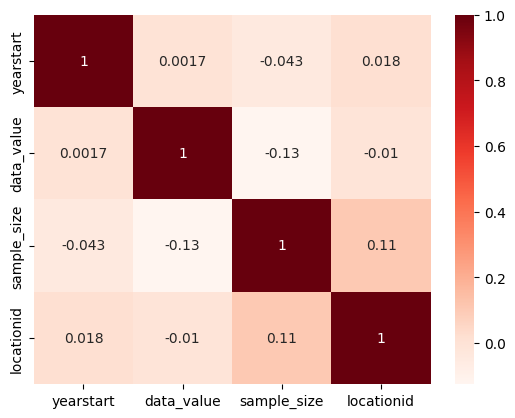

In [33]:
corr = numerical.corr()
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True, cmap='Reds')

In [34]:
#X = df[['yearstart','income', 'locationid']]
X = df[['yearstart','education', 'locationid']]
y = numerical['data_value']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,yearstart,education,locationid
8106,2014,2,15.0
3894,2013,0,8.0
26667,2013,3,42.0


In [36]:
std_scaler=StandardScaler().fit(X_train)

X_train_scaled=std_scaler.transform(X_train)


In [37]:
X_test_scaled=std_scaler.transform(X_test)

In [38]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 1.57993802  0.49635424 -0.843268  ]
 [ 0.66384716 -1.31063864 -1.30820209]
 [ 0.66384716  1.39985068  0.95004923]
 ...
 [ 0.66384716 -1.31063864  0.21943851]
 [ 0.66384716  1.39985068 -0.44475306]
 [-1.16833457  0.49635424 -0.44475306]]
--------
[[ 0.66384716  1.39985068 -0.64401053]
 [-0.25224371  0.49635424  1.54782163]
 [ 0.66384716 -1.31063864  1.21572585]
 ...
 [-1.16833457 -1.31063864 -1.30820209]
 [-0.25224371  1.39985068 -0.51117222]
 [-0.25224371  1.39985068  0.21943851]]


In [39]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled)

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             data_value   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     52.30
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           6.02e-33
Time:                        16:06:27   Log-Likelihood:                -10973.
No. Observations:                3018   AIC:                         2.195e+04
Df Residuals:                    3014   BIC:                         2.198e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.6486      0.167    183.320      0.0

In [40]:
predictions_test

array([27.71330745, 29.58486523, 33.34855875, ..., 33.45116761,
       27.73598441, 27.72098907])

In [41]:
print(model.rsquared_adj)

0.04853311642143521


In [42]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [43]:

model.coef_

array([-2.54033875e-02, -1.89114042e+00, -1.36321279e-03])

In [44]:
model.intercept_

84.54828553128404

In [45]:
model.score(X_test_scaled,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-32.73995981444931

In [46]:
y_pred=model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
y_test

9900     32.3
32069    28.1
28901    35.9
17596    36.5
5142     20.1
         ... 
19351    23.5
915      12.5
3375     25.7
11159    11.6
19217    11.3
Name: data_value, Length: 1294, dtype: float64

In [48]:

y_pred

array([81.88498528, 83.6139078 , 87.00836598, ..., 87.05835026,
       81.908076  , 81.90708003])

In [49]:

result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

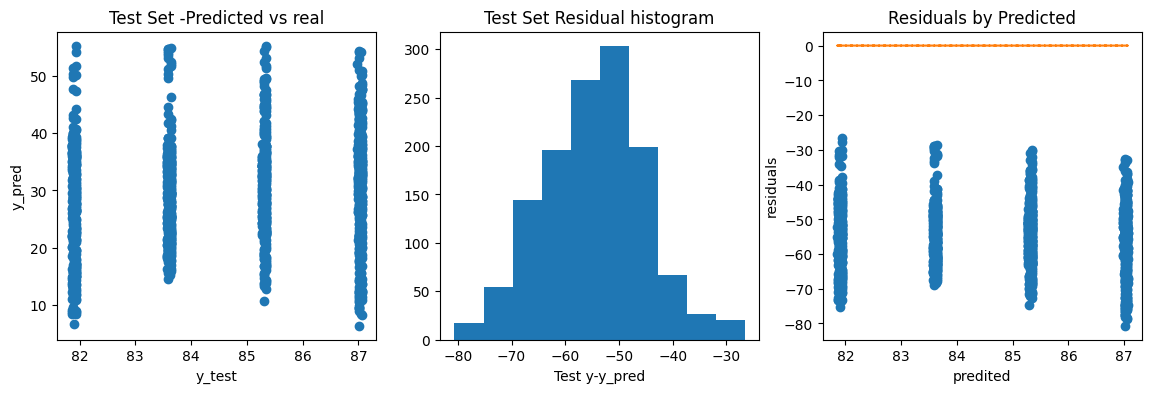

In [50]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<Axes: xlabel='y_test', ylabel='y_pred'>

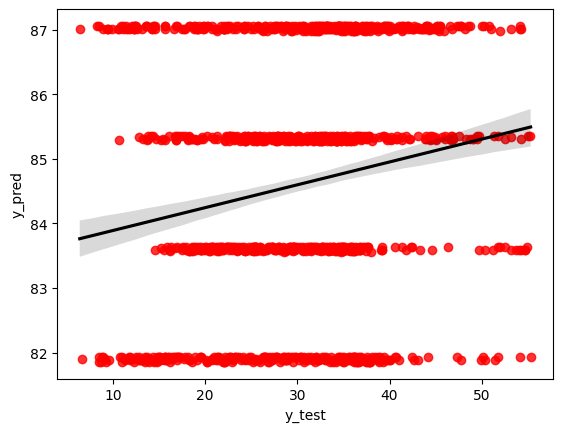

In [51]:
sns.regplot(x='y_test',y='y_pred', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [52]:
mse = mse(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2= 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)

Mean Squared Error: 3075.593654940039
R-squared: -32.73995981444931
Adjusted R-squared: -32.81842483727361


In [53]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)


In [54]:
features_importances

,Attribute,Importance
1,education,1.891140
0,yearstart,0.025403
2,locationid,0.001363


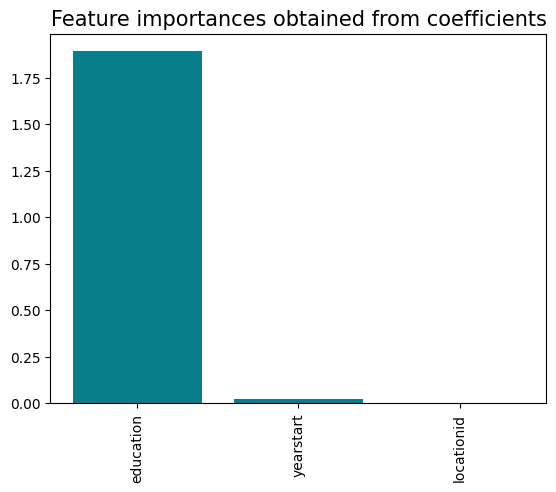

In [55]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=15)
plt.xticks(rotation='vertical')
plt.show()

In [56]:
df.to_csv('/content/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
